In [1]:
%matplotlib inline
import healpy as hp

In [2]:
d = hp.read_map('/fs/ess/PHS0336/data/tanveer/dr9/v3/elg_dnn/windows/nnwindow_0.hp1024.fits')

/users/PHS0336/medirz90/miniconda3/envs/sysnet/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [6]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [11]:
np.percentile(d[d!=0.0], [1, 99])

array([ 6.22025575, 10.06566978])

(array([  44141.,  103220.,  373720.,  813125., 1366143., 1344251.,
         659767.,  187529.,   60704.,   40997.]),
 array([ 6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ]),
 <a list of 10 Patch objects>)

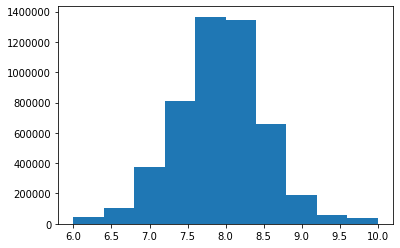

In [12]:
plt.hist(d[d!=0.0], range=(6., 10.))

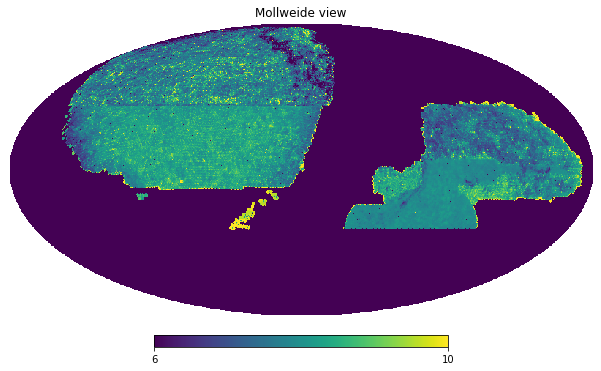

In [14]:
hp.mollview(d, min=6., max=10., rot=(120, ))